In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
pd.set_option('display.max_columns', None)

In [49]:
df = pd.read_csv(r'D:\Work file\bd_real_estate\data\processed\processed_data.csv').drop_duplicates()

In [50]:
df.head(1)

,Unnamed: 0,property_name,address,short_description,price,bedrooms,bathrooms,floor_area,property_url,type,teg
0,0,Flat For Sale In Agargaon Close To Agargaon Ja...,"West Agargaon, Agargaon",lovely apartment is vacant at the moment you g...,8500000.0,3,3,1275.0,https://www.bproperty.com/buy/dhaka/agargaon/f...,buy,agargaon


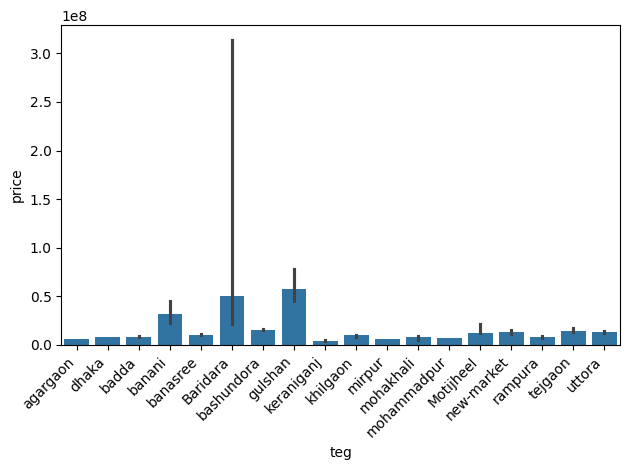

In [51]:
sns.barplot(x=df['teg'], y=df['price'], estimator=np.median)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [52]:
def calculate_price_per_sqft(price, floor_area):
    if floor_area <= 0:
        raise ValueError("Floor area must be greater than zero.")
    return price / floor_area

df['price_per_sqft'] = df.apply(lambda x: calculate_price_per_sqft(x['price'], x['floor_area']), axis=1)


In [53]:
df.head()

,Unnamed: 0,property_name,address,short_description,price,bedrooms,bathrooms,floor_area,property_url,type,teg,price_per_sqft
0,0,Flat For Sale In Agargaon Close To Agargaon Ja...,"West Agargaon, Agargaon",lovely apartment is vacant at the moment you g...,8500000.0,3,3,1275.0,https://www.bproperty.com/buy/dhaka/agargaon/f...,buy,agargaon,6666.666667
1,1,We Have A 1133 Sq.Ft Flat For Sale In The Loca...,"West Agargaon, Agargaon",the vacant flat surely is a reasonable deal co...,6231500.0,3,3,1133.0,https://www.bproperty.com/buy/dhaka/agargaon/w...,buy,agargaon,5500.000000
2,2,We Have A 1295 Sq.Ft Flat For Sale In Taltola .,Agargaon,amicable environment appropriate commuting sys...,6500000.0,3,2,1295.0,https://www.bproperty.com/buy/dhaka/agargaon/w...,buy,agargaon,5019.305019
3,3,See This 1300 Sq Ft Apartment For Sale Is All ...,Agargaon,this flat consists of facilities you can think...,6500000.0,2,2,1300.0,https://www.bproperty.com/buy/dhaka/agargaon/s...,buy,agargaon,5000.000000
4,4,A Must See This Apartment For Sale Is All Set ...,"Science Museum To Water Tank Road, Agargaon",looking for a suitable place to settle in the ...,7800000.0,3,3,1356.0,https://www.bproperty.com/buy/dhaka/agargaon/a...,buy,agargaon,5752.212389


In [54]:
df.drop(df[df['bedrooms'] >= 10].index, inplace=True)


In [55]:
df=df.drop(columns="Unnamed: 0")

In [56]:
df.shape

(5040, 11)

In [57]:
df[df['bathrooms'] >= 10]


,property_name,address,short_description,price,bedrooms,bathrooms,floor_area,property_url,type,teg,price_per_sqft
384,945 SFT Budget-Friendly Apartment For sale At ...,"Priyanka City, Uttara",a convenient 945 sq ft flat in the bustling ar...,6500000.0,3,32,945.0,https://www.bproperty.com/buy/dhaka/uttara/945...,buy,dhaka,6878.306878
4571,945 SFT Budget-Friendly Apartment For sale At ...,"Priyanka City, Uttara",a convenient 945 sq ft flat in the bustling ar...,6500000.0,3,32,945.0,https://www.bproperty.com/buy/dhaka/uttara/945...,buy,uttora,6878.306878


In [59]:

df.loc[384,'bathrooms']  =2
df.loc[4571,'bathrooms']  =2


In [61]:
df=df.drop(4571, inplace=True)
